<a href="https://colab.research.google.com/github/leandrorodor/ALR-Machine_Learning_AS/blob/main/regressao_linear_multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear múltipla
A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Leitura dos dados

Download Dataset: [rlma.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/movies_multilinear_reg.csv)

In [3]:
movies = pd.read_csv('/content/sample_data/rlma.csv')

In [4]:
type(movies)

pandas.core.frame.DataFrame

## Visualização dos dados

In [5]:
movies.head(10)

,movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
0,1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.468310,11.048216,5623234.602
1,2,Jumanji (1995),0,0,0,0,0,0,0,1,0,0,1,0,1,112.337916,14.927678,5714951.757
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,116.245732,27.114597,9524339.124
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,0,1,0,0,1,0,120.317732,4.994242,6331568.779
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,110.023572,19.142246,6409617.277
5,6,Heat (1995),0,0,0,0,0,1,1,0,0,0,0,0,0,97.324845,9.977311,4956557.317
6,7,Sabrina (1995),0,0,0,0,1,0,0,0,1,0,0,0,0,88.978893,14.257461,4654565.066
7,8,Tom and Huck (1995),0,0,0,0,0,0,0,0,0,0,1,0,1,78.536011,8.871800,3950017.325
8,9,Sudden Death (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,104.934703,29.112800,6850971.551
9,10,GoldenEye (1995),0,0,0,0,0,1,0,0,0,0,0,0,1,105.899475,3.695241,5157865.850


## Verificação do tamanho do dataset

In [6]:
movies.shape

(9125, 18)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
movies[movies.columns[2:17]].describe().round(2)

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
count,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00,9125.00
mean,0.05,0.09,0.06,0.10,0.17,0.19,0.12,0.07,0.36,0.05,0.06,0.48,0.12,109.83,16.60
std,0.23,0.28,0.24,0.29,0.38,0.39,0.33,0.26,0.48,0.22,0.24,0.50,0.33,20.04,12.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.82,3.44
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,96.15,6.19
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,109.71,12.05
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,123.46,24.62
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,185.35,50.00


## Box plot da variável dependente (y)

Text(0, 0.5, 'Ingressos')

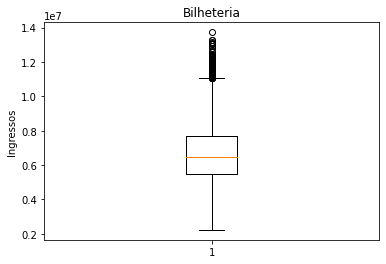

In [111]:
plt.boxplot(x=movies['Bilheteria'])
plt.title("Bilheteria")
plt.ylabel("Ingressos")

## Investigando a variável dependente (y) segundo determinada característica

Text(0, 0.5, 'Ingressos')

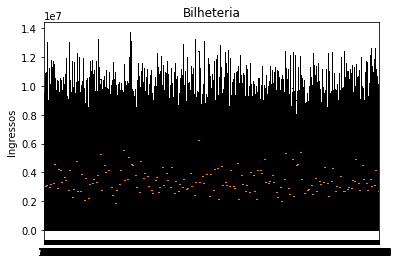

In [8]:
plt.boxplot(x=movies[['Bilheteria', 'Duracao']])
plt.title("Bilheteria")
plt.ylabel("Ingressos")

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável dependente (y)

Text(0.5, 1.0, 'Distribuição de Frequências')

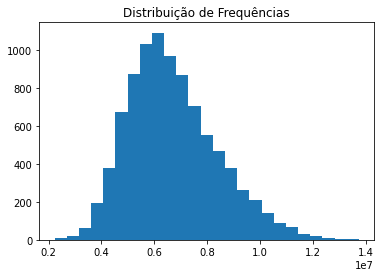

In [15]:
plt.hist(x=movies['Bilheteria'], bins = 25)
plt.title('Distribuição de Frequências')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [18]:
filmes_independente = movies[movies.columns[2:17]]

In [19]:
type(filmes_independente)

pandas.core.frame.DataFrame

## Criando uma Series (pandas) para armazenar variável dependente (y)

In [23]:
filmes_dependente = movies['Bilheteria']

In [24]:
filmes_dependente

0       5.623235e+06
1       5.714952e+06
2       9.524339e+06
3       6.331569e+06
4       6.409617e+06
            ...     
9120    6.318999e+06
9121    5.300340e+06
9122    6.945211e+06
9123    6.459004e+06
9124    1.063624e+07
Name: Bilheteria, Length: 9125, dtype: float64

In [25]:
type(filmes_dependente)

pandas.core.series.Series

## Criando os datasets de treino e de teste

In [28]:
treino, teste, treino_bilheteria, teste_bilheteria = train_test_split(filmes_independente, filmes_dependente)

## Verificando os tamanhos dos arquivos gerados pela função train_test_split

In [29]:
treino.head()

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
1393,0,0,0,0,1,0,0,0,1,0,0,1,0,123.543500,9.615631
8710,0,0,0,0,0,0,0,0,0,0,0,1,0,120.460427,3.828920
4025,0,0,0,0,0,0,0,0,1,0,0,0,0,151.885339,26.399730
4424,0,0,0,0,0,0,0,0,1,0,0,1,0,139.899790,25.399133
448,0,0,0,0,0,0,0,0,0,0,0,1,0,110.025685,21.649061


In [30]:
treino.shape[0]

6843

In [31]:
teste.shape[0]

2282

In [32]:
treino.shape[0]+teste.shape[0]

9125

## Instanciando a classe LinearRegression()

In [33]:
modelo = LinearRegression()
modelo.fit(treino,treino_bilheteria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (treino_bilheteria e treino)

In [34]:
modelo.fit(treino, treino_bilheteria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [35]:
print('R² = {}'.format(modelo.score(treino, treino_bilheteria).round(2)))

R² = 0.83


## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TESTE

In [36]:
print('R² = {}'.format(modelo.score(teste, teste_bilheteria).round(2)))

R² = 0.83


## Gerando previsões para os dados de TESTE (teste) utilizando o método predict() do objeto "modelo"

In [37]:
previsao_bilheteria = modelo.predict(teste)
previsao_bilheteria

array([7469789.08880355, 5912825.40339902, 9288837.75054187, ...,
       9380075.24405153, 8900384.32315662, 5875914.82645251])

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [34]:
print('R² = %s' % metrics.r2_score(teste_bilheteria, previsao_bilheteria).round(2))

R² = 0.82


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [36]:
entrada = teste[0:1]
entrada

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
6588,0,0,0,0,1,0,0,0,0,0,0,1,0,86.730539,29.579279


## Gerando previsão pontual

In [37]:
modelo.predict(entrada)[0]

array([6962277.97581228])

## Criando um simulador simples

In [107]:
Documentary=0
SciFi=0
Mystery=0
Horror=0
Romance=1
Thriller=0
Crime=0
Fantasy=0
Comedy=0
Animation=0
Children=0
Drama=0
Adventure=0
Duracao=86.730539
Investimento=29.579279
entrada=[[Documentary, SciFi, Mystery, Horror, Romance, Thriller, Crime, Fantasy, Comedy, Animation, Children, Drama, Adventure, Duracao, Investimento]]

print('{0:.2f} ingressos (Bilheteria)'.format(modelo.predict(entrada)[0]))

6959838.79 ingressos (Bilheteria)


#### Exemplo
#### 1,Toy Story (1995),0,0,0,0,0,0,0,1,1,1,1,0,1,103.4683096,11.04821649,5623234.602

In [40]:
previsto = modelo.predict([[0,0,0,0,0,0,0,1,1,1,1,0,1,103.4683096,11.04821649]])
previsto

array([5792505.3053686])

# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo
O intercepto representa o efeito médio em $Y$ (Bilheteria) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o intercepto representa o efeito médio em $Y$ (Bilheteria de Cerveja) quando todas as variáveis independentes são iguais a zero.

In [42]:
modelo.intercept_

24534.775124577805

In [44]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão
Os coeficientes de regressão $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Bilheteria), por unidade de variação em $X_2$, mantendo-se os valores de $X_3$ e $X_4$ ($Xn$) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.

In [45]:
modelo.coef_

array([ 42358.09228088,  24407.62418233,  33420.27913013, -41694.26837223,
        28509.82466034,  34169.29128746, -20935.23699957, -14039.82312516,
        -2588.08762102,  20994.56694658, -21443.44021581, -22709.30076912,
       -52828.65779035,  45841.40905553,  99087.74582601])

In [46]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [49]:
filmes_independente.columns

Index(['Documentary', 'Sci-Fi', 'Mystery', 'Horror', 'Romance', 'Thriller',
       'Crime', 'Fantasy', 'Comedy', 'Animation', 'Children', 'Drama',
       'Adventure', 'Duracao', 'Investimento'],
      dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [50]:
index = ['Intercepto', 'Documentary', 'Sci-Fi', 'Mystery', 'Horror', 'Romance', 'Thriller',
       'Crime', 'Fantasy', 'Comedy', 'Animation', 'Children', 'Drama',
       'Adventure', 'Duracao', 'Investimento']

## Criando um DataFrame para armazenar os coeficientes do modelo

In [51]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,24534.775125
Documentary,42358.092281
Sci-Fi,24407.624182
Mystery,33420.279130
Horror,-41694.268372
Romance,28509.824660
Thriller,34169.291287
Crime,-20935.237000
Fantasy,-14039.823125
Comedy,-2588.087621


## Interpretação dos Coeficientes Estimados
Intercepto → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4 ...Xn =0 $) o efeito médio na Bilheteria seria de 40379.948792 ingressos.

In [63]:
index

['Documentary',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Romance',
 'Thriller',
 'Crime',
 'Fantasy',
 'Comedy',
 'Animation',
 'Children',
 'Drama',
 'Adventure',
 'Duracao',
 'Investimento']

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [92]:
previsto_bilheteria = modelo.predict(teste)
previsto_bilheteria

array([7469789.08880355, 5912825.40339902, 9288837.75054187, ...,
       9380075.24405153, 8900384.32315662, 5875914.82645251])

## Gráfico de dispersão entre valor estimado e valor real

Text(0, 0.5, 'Bilheteria (Pessoas)')

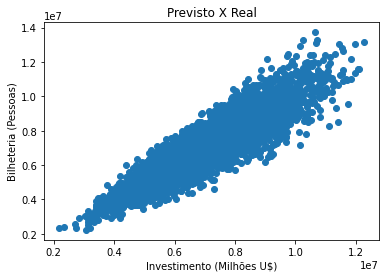

In [58]:
plt.scatter(x=previsto_bilheteria, y=treino_bilheteria)
plt.title('Previsto X Real')
plt.xlabel('Investimento (Milhões U$)')
plt.ylabel('Bilheteria (Pessoas)')

## Obtendo os resíduos

In [72]:
len(previsto_bilheteria)

6843

In [79]:
len(treino_bilheteria)

6843

In [65]:
residuo = treino_bilheteria - previsto_bilheteria
residuo

1393   -7.076841e+05
8710    1.101800e+06
4025    1.246867e+06
4424   -1.594375e+06
448     1.802036e+06
            ...     
1347   -9.473849e+05
8506   -3.952384e+05
3473   -5.400575e+05
8880    4.581403e+05
6950   -3.514027e+05
Name: Bilheteria, Length: 6843, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos
Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

Text(0, 0.5, 'Bilheteria (Ingressos) - Real')

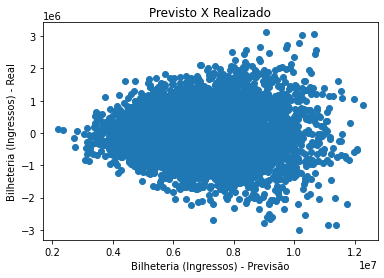

In [75]:
plt.scatter(x=previsto_bilheteria, y=residuo)
plt.title('Previsto X Realizado')
plt.xlabel('Bilheteria (Ingressos) - Previsão')
plt.ylabel('Bilheteria (Ingressos) - Real')

## Utilizando os resíduos ao quadrado

Text(0, 0.5, 'Resíduos²')

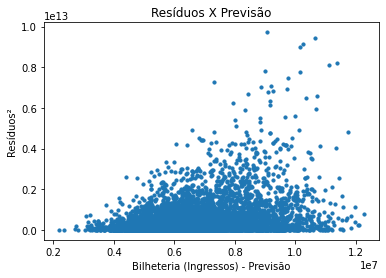

In [76]:
plt.scatter(x=previsto_bilheteria, y=residuo**2, s=10)
plt.title('Resíduos X Previsão')
plt.xlabel('Bilheteria (Ingressos) - Previsão')
plt.ylabel('Resíduos²')

## Plotando a distribuição de frequências dos resíduos

Text(0.5, 0, 'Ingressos')

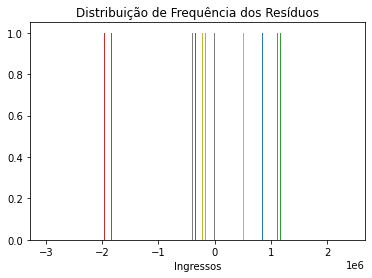

In [90]:
plt.hist(residuo, bins=30)
plt.title('Distribuição de Frequência dos Resíduos')
plt.xlabel('Ingressos')


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* do objetos "modelo"

In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

In [91]:
previsto_bilheteria

array([6643946.55570891, 5903300.19832781, 9600474.35125174, ...,
       5130444.30205255, 7389302.2917943 , 6148464.38114846])

## Obtendo métricas para o modelo

In [78]:
teste

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
3859,0,0,0,0,0,0,0,0,0,0,0,1,0,86.031062,35.566239
2395,1,0,0,0,0,0,0,0,0,0,0,0,0,94.357707,15.344403
6379,0,0,0,0,0,1,1,0,0,0,0,0,0,118.757809,38.420933
2355,0,0,0,0,1,0,0,0,1,0,0,0,1,71.201125,18.557700
4641,0,0,0,0,0,0,0,0,1,0,0,0,0,119.692973,21.090627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,0,0,0,0,1,0,0,0,1,0,0,0,0,148.814463,9.496976
740,0,0,0,0,0,0,0,1,0,0,1,0,1,98.443788,34.741632
7761,0,0,0,0,0,0,0,0,0,1,1,0,0,138.858075,30.180720
1284,0,0,0,0,0,0,0,0,0,0,0,1,0,148.302562,21.194956


In [103]:
EQM_2 = metrics.mean_squared_error(teste_bilheteria, previsto_bilheteria)
REQM_2 = np.sqrt(metrics.mean_squared_error(teste_bilheteria, previsto_bilheteria))
R2_2 = metrics.r2_score(teste_bilheteria, previsto_bilheteria)


pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,4.981305e+11
REQM,7.057836e+05
R²,8.256413e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Gerando previsão pontual (Zootopia)
```
movieId,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Bilheteria
9999999,Zootopia,0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356,?????
```

In [ ]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]
modelo.predict([zootopia])

array([[ 7779149.0280967]])

## Salvando o modelo estimado

In [104]:
import pickle

In [106]:
output = open('modelo_bilheteria', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_bilheteria','rb')
lm_new = pickle.load(modelo)
modelo.close()

Documentary=0
SciFi=0
Mystery=0
Horror=0
Romance=1
Thriller=0
Crime=0
Fantasy=0
Comedy=0
Animation=0
Children=0
Drama=0
Adventure=0
Duracao=86.730539
Investimento=29.579279

entrada=[[Documentary, SciFi, Mystery, Horror, Romance, Thriller, Crime, Fantasy, Comedy, Animation, Children, Drama, Adventure, Duracao, Investimento]]

print('{0:.2f} ingressos'.format(lm_new.predict(entrada)[0]))
```

# <font color='red' style='font-size: 30px;'>Alterando tamanho dos dados</font>
<hr style='border: 2px solid red;'>

## Split dos dados com test_size=0.3

In [108]:
treino_2, teste_2, treino_bilheteria_2, teste_bilheteria_2 = train_test_split(filmes_independente, filmes_dependente, test_size=0.3)

In [110]:
modelo_30 = LinearRegression()
modelo_30.fit(treino,treino_bilheteria)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
modelo_30.score(teste, teste_bilheteria)

0.8256412506801167

In [113]:
zootopia = [0,0,0,0,0,0,0,0,1,1,1,0,1,145.5170642,3.451632127]
modelo_30.predict([zootopia])

array([6981390.86788126])

In [114]:
planeta_macaco = [0,1,0,0,0,0,0,0,0,0,0,0,0,150,5]
modelo_30.predict([planeta_macaco])

array([7420592.48676667])